## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

## Пример построения  двухслойной нейронной сети на numpy

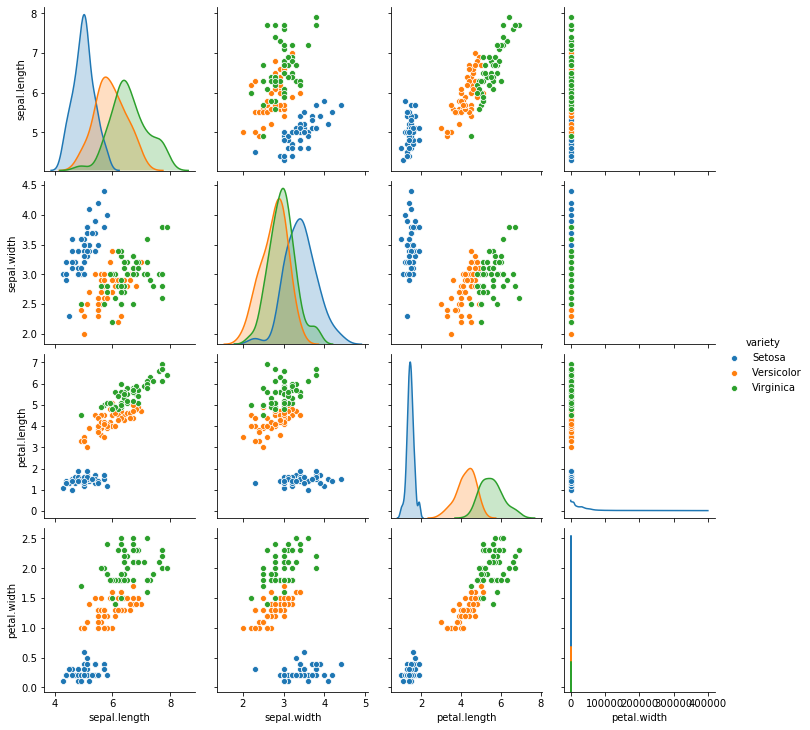

Точность нейронной сети 97.87%


In [88]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
#g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
g = sns.pairplot(iris_data, hue="variety")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['variety'].replace(['Setosa', 'Virginica', 'Versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['variety']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 8)) - 1 # для 1 слоя - 4 входа, 8 выходов
w1 = 2*np.random.random((8, 6)) - 1 # для 2 слоя - 8 входов, 6 выходов
w2 = 2*np.random.random((6, 3)) - 1 # для 3 слоя - 6 входов, 3 выхода


# скорость обучения (learning rate)
n = 0.0005
# количетсво эпох
epochs = 400000
# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

### Исследование влияния параметров

    Было проведено исследование влияния на показатель accuracy следующих параметров:
    n - скорость обучения;
    epochs - количество эпох;
    структуры сети.

    n = 0.1   epochs = 100000 w0(4,5) w1(5,3) -- accuracy = 96.05
    n = 0.01  epochs = 100000 w0(4,5) w1(5,3) -- accuracy = 97.02
    n = 0.001 epochs = 100000 w0(4,5) w1(5,3) -- accuracy = 91.65
    Точность при уменьшении шага сначала увеличилась, а потом уменьшилась. Уеньшилась потому что количество эпох слишком мало для нового значения шага. Увеличим количество эпох:
    n = 0.001 epochs = 200000 w0(4,5) w1(5,3) -- accuracy = 97.4
    n = 0.001 epochs = 300000 w0(4,5) w1(5,3) -- accuracy = 96.99
    Далее улучшений не было, изменим структуру сети. При добавлении слоя точность снизилась, поэтому пришлось уменьшить шаг и увеличить количество эпох:
    n = 0.001 epochs = 300000 w0(4,8) w1(8,6) w2(6,3) -- accuracy = 94.18
    n = 0.0005 epochs = 300000 w0(4,8) w1(8,6) w2(6,3) -- accuracy = 97.18
    n = 0.0005 epochs = 400000 w0(4,8) w1(8,6) w2(6,3) -- accuracy = 97.87

### Выводы

    Получены следующие выводы:
    при уменьшении n точность повышается, но время сходимости увеличивается, поэтому необходимо увеличивать количество эпох, иначе модель останется недообученной; 
    количетсво эпох стоит выбирать таким, чтобы точность модели выходила на постоянное значение, но при этом не проявлялось переобучение; 
    усложнение модели (добавление нейронов или весов) позволяет модели извлекать из данных более сложные закономерности (и точнее работать), но при этом появляется вероятность переобучиться, особенно если данных для тренировки немного.